In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [4]:
val_dates = ['180327','180329']
test_dates = ['180330','180331']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
bad_dates = []
test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

val dates: ['180327', '180329'], test dates: ['180330', '180331']
val instances: 6284, val imbalance: 0.7856460809707642
test instances: 6249, test imbalance: 0.7385181784629822
train instances: 21590, train imbalance: 0.5


In [6]:
CH = 'all'
device = torch.device('cuda')

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128)

In [7]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180325, rec:004, time:2348.0, label:1.0
date:180401, rec:001, time:1190.0, label:0.0


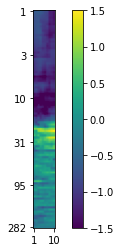

date:180324, rec:003, time:2419.0, label:1.0
date:180325, rec:009, time:6792.0, label:1.0
date:180323, rec:003, time:517.0, label:1.0
date:180324, rec:008, time:351.0, label:1.0
date:180324, rec:001, time:6727.0, label:1.0
date:180324, rec:006, time:1741.0, label:1.0
date:180325, rec:009, time:1060.0, label:0.0


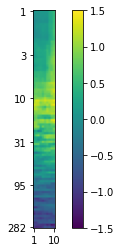

date:180323, rec:002, time:2996.0, label:1.0
date:180326, rec:003, time:5753.0, label:1.0
date:180401, rec:001, time:4166.0, label:1.0
date:180324, rec:008, time:1561.0, label:0.0


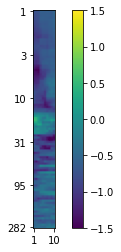

date:180325, rec:006, time:1888.0, label:1.0
date:180323, rec:007, time:4321.0, label:0.0


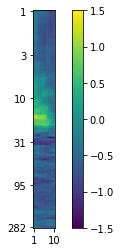

date:180325, rec:001, time:1820.0, label:0.0


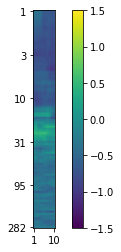

date:180322, rec:002, time:3869.0, label:1.0
date:180325, rec:001, time:1820.0, label:0.0


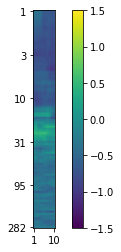

date:180325, rec:001, time:6881.0, label:1.0
date:180324, rec:001, time:2915.0, label:1.0
date:180324, rec:008, time:3693.0, label:0.0


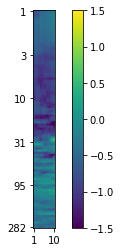

date:180401, rec:001, time:1220.0, label:0.0


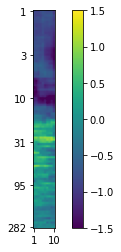

date:180325, rec:007, time:5793.0, label:0.0


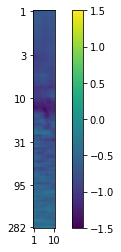

date:180322, rec:005, time:100.0, label:1.0
date:180324, rec:008, time:2508.0, label:0.0


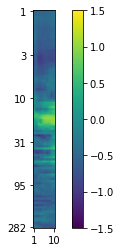

date:180323, rec:007, time:2925.0, label:0.0


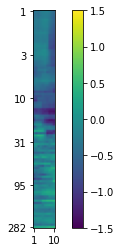

date:180323, rec:007, time:4672.0, label:0.0


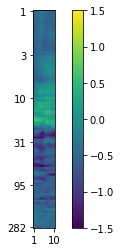

date:180326, rec:004, time:6392.0, label:1.0
date:180325, rec:009, time:1410.0, label:0.0


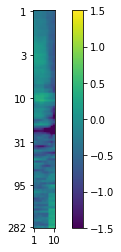

date:180322, rec:003, time:3278.0, label:1.0
date:180322, rec:001, time:7166.0, label:1.0
date:180325, rec:001, time:1370.0, label:0.0


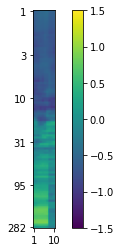

date:180325, rec:003, time:4278.0, label:1.0
date:180325, rec:004, time:4914.0, label:1.0
date:180322, rec:005, time:1665.0, label:1.0
date:180325, rec:009, time:1050.0, label:0.0


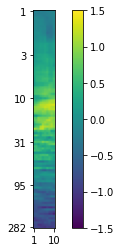

date:180324, rec:003, time:1619.0, label:1.0
date:180324, rec:001, time:40.0, label:0.0


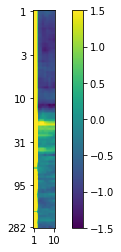

date:180325, rec:007, time:6253.0, label:0.0


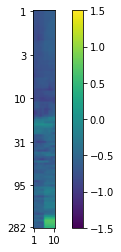

date:180326, rec:004, time:6076.0, label:1.0
date:180322, rec:007, time:1587.0, label:0.0


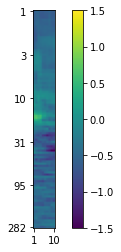

date:180324, rec:004, time:5069.0, label:1.0
date:180322, rec:007, time:4510.0, label:0.0


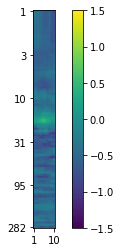

date:180324, rec:009, time:1882.0, label:1.0
date:180323, rec:004, time:4669.0, label:1.0
date:180324, rec:001, time:928.0, label:0.0


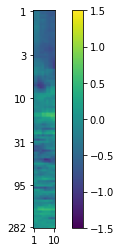

date:180325, rec:007, time:5053.0, label:0.0


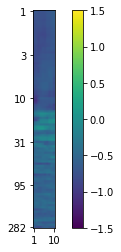

date:180326, rec:003, time:4646.0, label:0.0


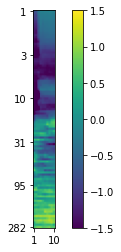

date:180324, rec:008, time:3553.0, label:0.0


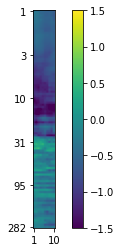

date:180323, rec:002, time:4326.0, label:1.0
date:180401, rec:001, time:3283.0, label:1.0
date:180323, rec:002, time:1537.0, label:1.0
date:180324, rec:006, time:3229.0, label:1.0
date:180325, rec:009, time:1820.0, label:0.0


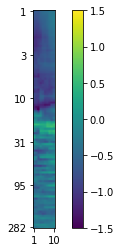

date:180325, rec:009, time:3256.0, label:1.0
date:180323, rec:003, time:4687.0, label:1.0
date:180324, rec:008, time:5474.0, label:0.0


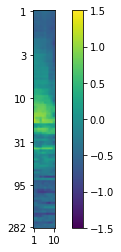

date:180401, rec:001, time:5147.0, label:0.0


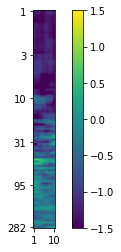

date:180324, rec:008, time:5394.0, label:0.0


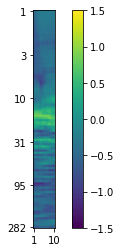

date:180401, rec:001, time:1090.0, label:0.0


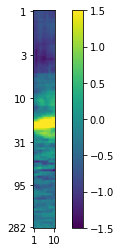

date:180401, rec:002, time:3306.0, label:1.0
date:180324, rec:005, time:3109.0, label:1.0
date:180325, rec:004, time:3830.0, label:1.0
date:180325, rec:006, time:5840.0, label:1.0
date:180325, rec:005, time:2316.0, label:1.0
date:180325, rec:005, time:4933.0, label:1.0
date:180325, rec:009, time:1630.0, label:0.0


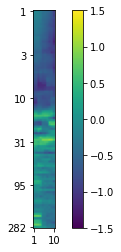

date:180401, rec:001, time:1010.0, label:0.0


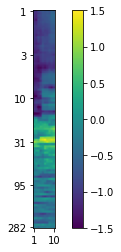

date:180324, rec:005, time:2250.0, label:1.0
date:180322, rec:005, time:1625.0, label:1.0
date:180325, rec:007, time:3809.0, label:0.0


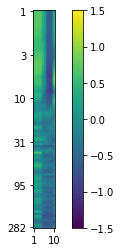

date:180324, rec:003, time:2329.0, label:1.0
date:180323, rec:002, time:5886.0, label:1.0
date:180401, rec:001, time:90.0, label:0.0


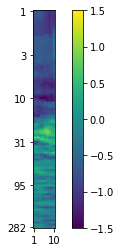

date:180324, rec:008, time:6004.0, label:0.0


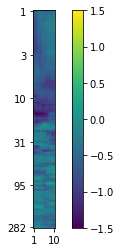

date:180325, rec:009, time:1730.0, label:0.0


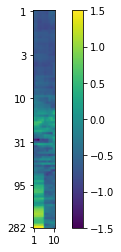

date:180322, rec:007, time:4340.0, label:0.0


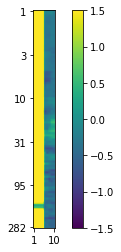

date:180325, rec:007, time:4623.0, label:0.0


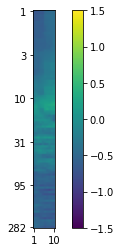

date:180323, rec:001, time:6723.0, label:1.0
date:180324, rec:008, time:2051.0, label:0.0


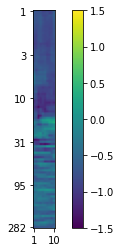

date:180323, rec:007, time:5741.0, label:0.0


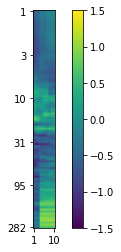

date:180325, rec:009, time:4749.0, label:0.0


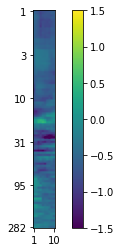

date:180325, rec:001, time:840.0, label:0.0


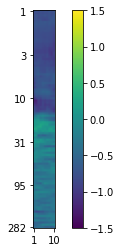

date:180323, rec:007, time:40.0, label:1.0
date:180323, rec:001, time:1140.0, label:0.0


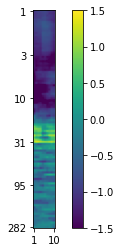

date:180322, rec:003, time:2678.0, label:1.0
date:180325, rec:007, time:7003.0, label:0.0


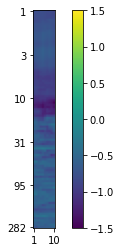

date:180324, rec:006, time:3339.0, label:1.0
date:180325, rec:001, time:680.0, label:0.0


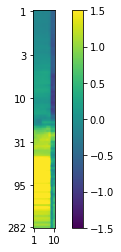

date:180325, rec:009, time:2420.0, label:0.0


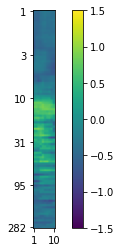

date:180322, rec:004, time:4929.0, label:1.0
date:180322, rec:007, time:1417.0, label:0.0


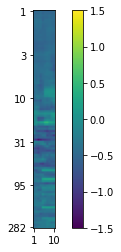

date:180322, rec:007, time:4990.0, label:0.0


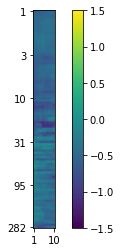

date:180324, rec:001, time:190.0, label:0.0


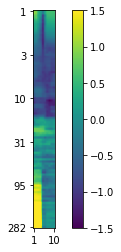

date:180324, rec:006, time:1603.0, label:1.0
date:180401, rec:001, time:3736.0, label:1.0
date:180325, rec:009, time:1280.0, label:0.0


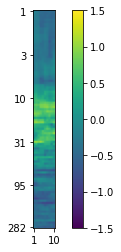

date:180324, rec:003, time:280.0, label:1.0
date:180323, rec:003, time:3641.0, label:1.0
date:180401, rec:001, time:5307.0, label:0.0


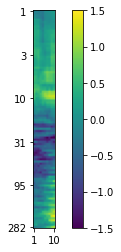

date:180324, rec:008, time:3038.0, label:0.0


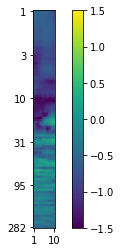

date:180322, rec:004, time:5059.0, label:1.0
date:180324, rec:009, time:1137.0, label:0.0


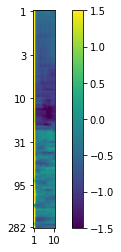

date:180401, rec:001, time:110.0, label:0.0


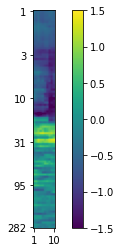

date:180325, rec:001, time:5894.0, label:1.0
date:180322, rec:005, time:6929.0, label:1.0
date:180322, rec:007, time:4390.0, label:0.0


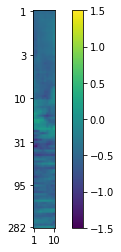

date:180401, rec:003, time:1040.0, label:1.0
date:180324, rec:005, time:230.0, label:1.0
date:180401, rec:002, time:6324.0, label:1.0
date:180322, rec:005, time:1038.0, label:1.0
date:180325, rec:004, time:1658.0, label:1.0
date:180324, rec:008, time:2698.0, label:0.0


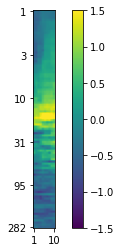

date:180325, rec:001, time:3202.0, label:0.0


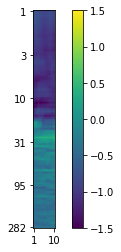

date:180325, rec:003, time:430.0, label:1.0
date:180401, rec:001, time:1540.0, label:0.0


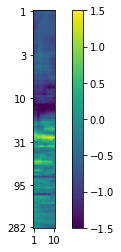

date:180325, rec:007, time:4813.0, label:0.0


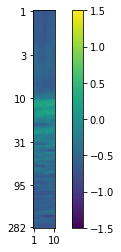

date:180324, rec:001, time:5360.0, label:0.0


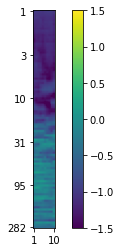

date:180325, rec:007, time:6213.0, label:0.0


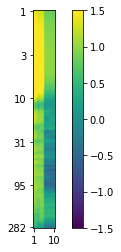

date:180325, rec:006, time:5005.0, label:1.0
date:180325, rec:007, time:2726.0, label:0.0


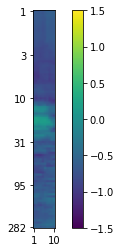

date:180401, rec:001, time:1000.0, label:0.0


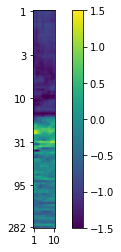

date:180325, rec:001, time:40.0, label:0.0


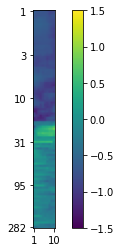

date:180325, rec:005, time:1574.0, label:1.0
date:180401, rec:001, time:5217.0, label:0.0


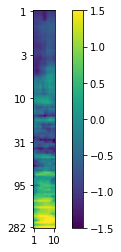

date:180325, rec:003, time:70.0, label:1.0
date:180401, rec:001, time:5147.0, label:0.0


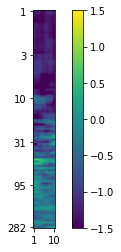

date:180323, rec:005, time:3057.0, label:1.0


In [8]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [9]:
learning_rate = 0.001


model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

NameError: name 'device' is not defined